# Analysing the Bollywood Movie Database

At the heart of this analyses:

1. I searched for which genre is the most released.
2. I compared genres by their release time.
3. I searched for the month that has the most releases.
4. I searched for the high-budget movies by month.
5. I calculated the ROIs for the top 10 movies (rated based on ROI).
6. I examined how the budget was distributed between low and high budget.
7. I compared the genres based on ROI.
8. I compared the relationship between box office collection and Youtube likes.
9. I compared the relationship among budget, box office collection, Youtube views, and Youtube likes in pairs.

In [1]:
import pandas as pd

# Reading file using pandas
bollywood_df = pd.read_csv('bollywood.csv')

In [2]:
# Checking the first few rows
bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [65]:
# removing leading and trailing white spaces from observations 
bollywood_df = bollywood_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
bollywood_df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Released,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,103.00
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,11.00
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,3.00
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.65
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,9.80
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,29.00
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,31.10
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,11.00
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3,10.89


In [66]:
# Checking the data types of the columns
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
 10  Month Released       149 non-null    int64  
 11  ROI                  149 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 14.1+ KB


In [67]:
bollywood_df.set_index('SlNo')

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Released,ROI
SlNo,,,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,103.00
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,11.00
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,3.00
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.65
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,9.80
...,...,...,...,...,...,...,...,...,...,...,...
145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,29.00
146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,31.10
147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,11.00


# 1. Counting the number of genres

In [68]:
# Counting the number of genres
pd.DataFrame(bollywood_df.groupby('Genre')['Genre'].value_counts().sort_values(ascending=False))

,count
Genre,
Comedy,36
Drama,35
Thriller,29
Romance,25
Action,24


# 2. Cross tabulating genre against release time

In [69]:
# Cross tabulating genre against release time
pd.crosstab(bollywood_df['Genre'], bollywood_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


# 3. Finding the month with the maximum number of movie seen

In [70]:
# Creating a month released column from the released date column
bollywood_df['Month Released'] = pd.DatetimeIndex(bollywood_df['Release Date']).month
bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Released,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,103.00
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,11.00
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,3.00
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.65
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,9.80


In [71]:
# Finding the month with the maximum number of movie seen
month__max_seen = pd.DataFrame(bollywood_df.groupby('Month Released')['Month Released'].value_counts().sort_values(ascending=False))
month__max_seen

,count
Month Released,
1,20
3,19
5,18
2,16
7,16
4,11
6,10
9,10
11,10


# 4. Filtering the data to extract a dataframe for high-budget movies

In [72]:
# filtering the data to extract a dataframe for high-budget movies
high_budget_movies = bollywood_df[bollywood_df['Budget']>25]


In [73]:
# grouping high-budget movies based on month
high_budget_movies_by_month = pd.DataFrame(high_budget_movies.groupby('Month Released')['Month Released'].value_counts().sort_values(ascending=False))

In [74]:
high_budget_movies_by_month

,count
Month Released,
2,9
8,7
1,6
3,6
7,6
11,6
6,5
4,4
9,4


# 5. Calculating a movie's ROI

In [75]:
# calculating a movie's ROI
movies_ROI = (bollywood_df['BoxOfficeCollection'] - bollywood_df['Budget']/bollywood_df['Budget'])

# creating a column for ROI
bollywood_df['ROI'] = movies_ROI

In [76]:
# selecting the top 10 movies with the highest ROI
top10_movies_ROI = bollywood_df[['MovieName','ROI']].sort_values(ascending=False, by='ROI').head(10)

In [77]:
top10_movies_ROI

,MovieName,ROI
89,PK,734.0
115,Chennai Express,394.0
26,Happy New Year,382.0
43,Kick,376.0
92,Bang Bang,339.0
82,Yeh Jawaani Hai Deewani,310.0
119,Krrish 3,299.0
132,Grand Masti,297.0
78,Singham Returns,199.0
101,Bhaag Milkha Bhaag,163.0


# 6. Calculating average ROIs based on release time

In [78]:
# calculating average ROIs based on release time
avg_ROI_by_release_times = pd.DataFrame(bollywood_df.groupby('ReleaseTime')['ROI'].mean())
avg_ROI_by_release_times

,ROI
ReleaseTime,
FS,88.535294
HS,73.619444
LW,97.322000
N,38.942828


It can be noted that movies released on LW (long weekend) offer a higher average ROI compared to other release times. The N (Normal) release time provides the least average ROI for a movie.

# Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 7. Distribution of Movie Budget

(array([25., 39., 19., 21., 12.,  7.,  8.,  3.,  0.,  4.,  0.,  4.,  0.,
         2.,  0.,  2.,  1.,  0.,  1.,  1.]),
 array([  2. ,   9.4,  16.8,  24.2,  31.6,  39. ,  46.4,  53.8,  61.2,
         68.6,  76. ,  83.4,  90.8,  98.2, 105.6, 113. , 120.4, 127.8,
        135.2, 142.6, 150. ]),
 <BarContainer object of 20 artists>)

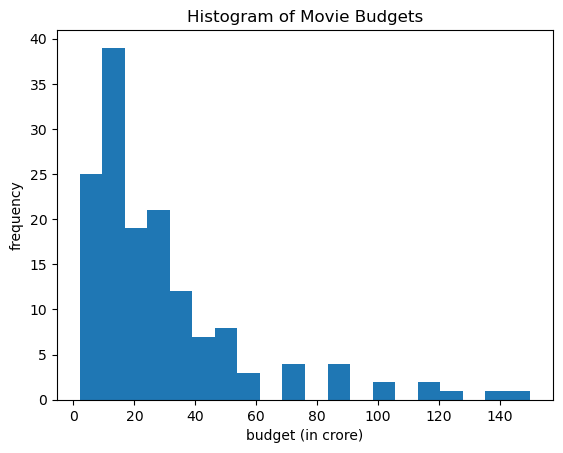

In [83]:
# title 
plt.title('Histogram of Movie Budgets')

# labels
plt.xlabel('budget (in crore)')
plt.ylabel('frequency')

plt.hist(bollywood_df['Budget'], bins=20)

The distribution shows skewness to the right, which indicates that most movies are low-budgeted with a few high-budget movies. 
High-budgeted movies are movies costing more than 25 crore. 

C:\Users\USER\AppData\Local\Temp\ipykernel_1976\1758457960.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bollywood_df['Budget'])


<Axes: title={'center': 'Distribution of Movie Budgets'}, xlabel='Budget', ylabel='frequency'>

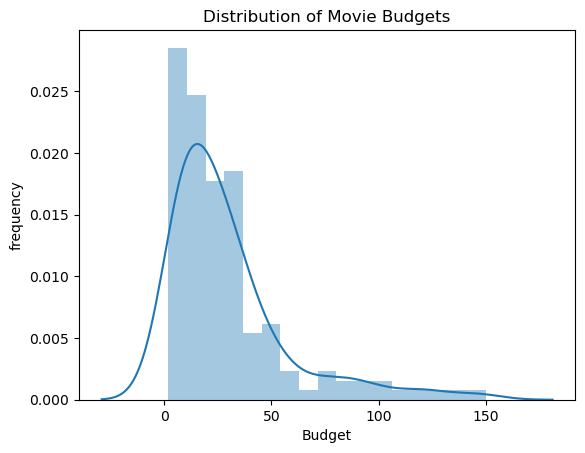

In [84]:
# title 
plt.title('Distribution of Movie Budgets')

# labels
plt.xlabel('budget (in crore)')
plt.ylabel('frequency')

sns.distplot(bollywood_df['Budget'])

# 8. Distribution of Movie Budget by Genre

C:\Users\USER\AppData\Local\Temp\ipykernel_1976\292779992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bollywood_df[bollywood_df['Genre']== 'Comedy']['ROI'],
C:\Users\USER\AppData\Local\Temp\ipykernel_1976\292779992.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bollywood_df[bollywoo

<Axes: xlabel='ROI', ylabel='Density'>

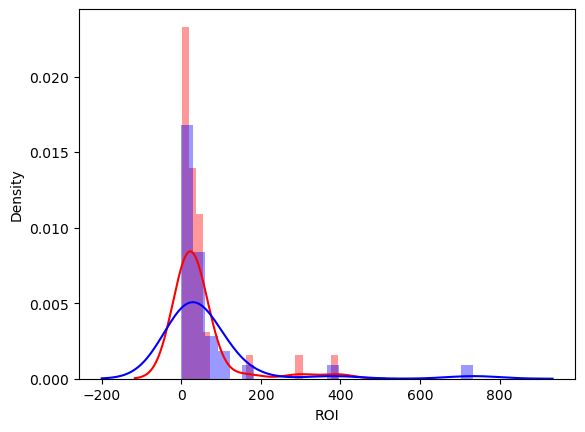

In [82]:
sns.distplot(bollywood_df[bollywood_df['Genre']== 'Comedy']['ROI'],
            color='r',
            label='Comedy')

sns.distplot(bollywood_df[bollywood_df['Genre']== 'Drama']['ROI'],
            color='b',
            label='Drama')

# 9. Relationship between Variables

<Axes: xlabel='YoutubeLikes', ylabel='BoxOfficeCollection'>

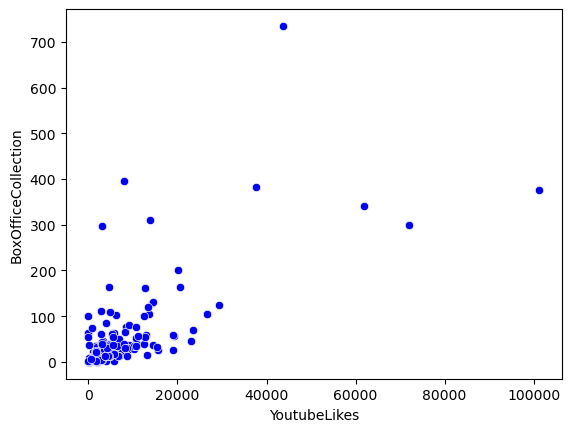

In [45]:
sns.scatterplot(x=bollywood_df['YoutubeLikes'], y=bollywood_df['BoxOfficeCollection'], color='b')

In [47]:
bollywood_df[['YoutubeLikes', 'BoxOfficeCollection']].corr()

,YoutubeLikes,BoxOfficeCollection
YoutubeLikes,1.000000,0.682517
BoxOfficeCollection,0.682517,1.000000


The correlation between YoutubeLike and BoxOfficeCollection is positive and relatively strong. This suggests that YoutubeLike 
tends to increase as BoxOfficeCollection increases.

<Axes: xlabel='Genre', ylabel='YoutubeLikes'>

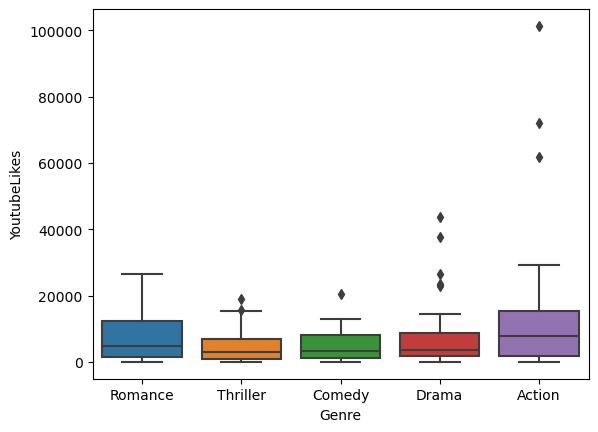

In [79]:
sns.boxplot(x=bollywood_df['Genre'], y=bollywood_df['YoutubeLikes'])

The median YoutubeLikes for Action is the highest while the other genres have similar 
median. Comedy, Drama, and Action have outliers.

In [80]:
all_features = ['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']
features_corr = bollywood_df[all_features].corr()
features_corr

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


<Axes: >

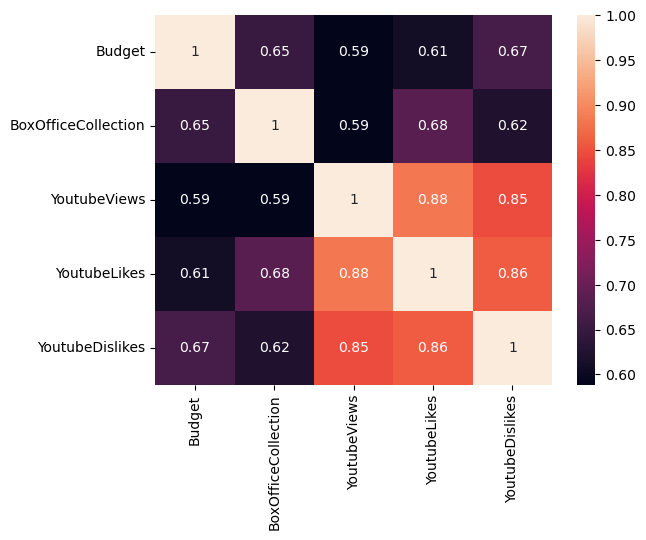

In [81]:
sns.heatmap(features_corr,annot=True)

YoutubeViews and YoutubeDislikes have the highest correlation (positive) among the other pairs of variables. The lowest correlation is between Budget and YoutubeViews and BoxOfficeCollections and YoutubeViews.